In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import nmc_verification.nmc_vf_base as nvb
import nmc_verification.nmc_vf_method as nvm
import nmc_verification.nmc_vf_product as nvp
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
import matplotlib as mpl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#设置数据路径的通配格式
dir_ob = r"J:\ppt\ob\sta\rain01\BTYYMMDDHH.000"
dir_prod = r"L:\prod\pre\YYYYMMDDHH.TTT.nc"
station = nvb.read_station(nvb.station_国家站)

In [8]:
time0 = datetime.datetime(2018,1,1,0,0)
time_end = datetime.datetime(2019,1,1,0,0)
ob_sta_list = []
while time0 < time_end:
    path = nvb.get_path(dir_ob,time0)
    sta = nvb.read_stadata_from_micaps3(path,station = station,time = time0)
    ob_sta_list.append(sta)
    time0 += datetime.timedelta(hours = 1)
    print(time0)
ob_sta_all = pd.concat(ob_sta_list, axis=0)
sta_all = nvb.between_value_range(ob_sta_all,0,1000)

2018-01-01 01:00:00
2018-01-01 02:00:00
2018-01-01 03:00:00
2018-01-01 04:00:00
2018-01-01 05:00:00
2018-01-01 06:00:00
2018-01-01 07:00:00
2018-01-01 08:00:00
2018-01-01 09:00:00
2018-01-01 10:00:00
2018-01-01 11:00:00
2018-01-01 12:00:00
2018-01-01 13:00:00
2018-01-01 14:00:00
2018-01-01 15:00:00
2018-01-01 16:00:00
2018-01-01 17:00:00
2018-01-01 18:00:00
2018-01-01 19:00:00
2018-01-01 20:00:00
2018-01-01 21:00:00
2018-01-01 22:00:00
2018-01-01 23:00:00
2018-01-02 00:00:00
2018-01-02 01:00:00
2018-01-02 02:00:00
2018-01-02 03:00:00
2018-01-02 04:00:00
2018-01-02 05:00:00
2018-01-02 06:00:00
2018-01-02 07:00:00
2018-01-02 08:00:00
2018-01-02 09:00:00
2018-01-02 10:00:00
2018-01-02 11:00:00
2018-01-02 12:00:00
2018-01-02 13:00:00
2018-01-02 14:00:00
2018-01-02 15:00:00
2018-01-02 16:00:00
2018-01-02 17:00:00
2018-01-02 18:00:00
2018-01-02 19:00:00
2018-01-02 20:00:00
2018-01-02 21:00:00
2018-01-02 22:00:00
2018-01-02 23:00:00
2018-01-03 00:00:00
2018-01-03 01:00:00
2018-01-03 02:00:00


2018-01-18 04:00:00
2018-01-18 05:00:00
2018-01-18 06:00:00
2018-01-18 07:00:00
2018-01-18 08:00:00
2018-01-18 09:00:00
2018-01-18 10:00:00
2018-01-18 11:00:00
2018-01-18 12:00:00
2018-01-18 13:00:00
2018-01-18 14:00:00
2018-01-18 15:00:00
2018-01-18 16:00:00
2018-01-18 17:00:00
2018-01-18 18:00:00
2018-01-18 19:00:00
2018-01-18 20:00:00
2018-01-18 21:00:00
2018-01-18 22:00:00
2018-01-18 23:00:00
2018-01-19 00:00:00
2018-01-19 01:00:00
2018-01-19 02:00:00
2018-01-19 03:00:00
2018-01-19 04:00:00
2018-01-19 05:00:00
2018-01-19 06:00:00
2018-01-19 07:00:00
2018-01-19 08:00:00
2018-01-19 09:00:00
2018-01-19 10:00:00
2018-01-19 11:00:00
2018-01-19 12:00:00
2018-01-19 13:00:00
2018-01-19 14:00:00
2018-01-19 15:00:00
2018-01-19 16:00:00
2018-01-19 17:00:00
2018-01-19 18:00:00
2018-01-19 19:00:00
2018-01-19 20:00:00
2018-01-19 21:00:00
2018-01-19 22:00:00
2018-01-19 23:00:00
2018-01-20 00:00:00
2018-01-20 01:00:00
2018-01-20 02:00:00
2018-01-20 03:00:00
2018-01-20 04:00:00
2018-01-20 05:00:00


2018-02-04 06:00:00
2018-02-04 07:00:00
2018-02-04 08:00:00
2018-02-04 09:00:00
2018-02-04 10:00:00
2018-02-04 11:00:00
2018-02-04 12:00:00
2018-02-04 13:00:00
2018-02-04 14:00:00
2018-02-04 15:00:00
2018-02-04 16:00:00
2018-02-04 17:00:00
2018-02-04 18:00:00
2018-02-04 19:00:00
2018-02-04 20:00:00
2018-02-04 21:00:00
2018-02-04 22:00:00
2018-02-04 23:00:00
2018-02-05 00:00:00
2018-02-05 01:00:00
2018-02-05 02:00:00
2018-02-05 03:00:00
2018-02-05 04:00:00
2018-02-05 05:00:00
2018-02-05 06:00:00
2018-02-05 07:00:00
2018-02-05 08:00:00
2018-02-05 09:00:00
2018-02-05 10:00:00
2018-02-05 11:00:00
2018-02-05 12:00:00
2018-02-05 13:00:00
2018-02-05 14:00:00
2018-02-05 15:00:00
2018-02-05 16:00:00
2018-02-05 17:00:00
2018-02-05 18:00:00
2018-02-05 19:00:00
2018-02-05 20:00:00
2018-02-05 21:00:00
2018-02-05 22:00:00
2018-02-05 23:00:00
2018-02-06 00:00:00
2018-02-06 01:00:00
2018-02-06 02:00:00
2018-02-06 03:00:00
2018-02-06 04:00:00
2018-02-06 05:00:00
2018-02-06 06:00:00
2018-02-06 07:00:00


2018-02-21 08:00:00
2018-02-21 09:00:00
2018-02-21 10:00:00
2018-02-21 11:00:00
2018-02-21 12:00:00
2018-02-21 13:00:00
2018-02-21 14:00:00
2018-02-21 15:00:00
2018-02-21 16:00:00
2018-02-21 17:00:00
2018-02-21 18:00:00
2018-02-21 19:00:00
2018-02-21 20:00:00
2018-02-21 21:00:00
2018-02-21 22:00:00
2018-02-21 23:00:00
2018-02-22 00:00:00
2018-02-22 01:00:00
2018-02-22 02:00:00
2018-02-22 03:00:00
2018-02-22 04:00:00
2018-02-22 05:00:00
2018-02-22 06:00:00
2018-02-22 07:00:00
2018-02-22 08:00:00
2018-02-22 09:00:00
2018-02-22 10:00:00
2018-02-22 11:00:00
2018-02-22 12:00:00
2018-02-22 13:00:00
2018-02-22 14:00:00
2018-02-22 15:00:00
2018-02-22 16:00:00
2018-02-22 17:00:00
2018-02-22 18:00:00
2018-02-22 19:00:00
2018-02-22 20:00:00
2018-02-22 21:00:00
2018-02-22 22:00:00
2018-02-22 23:00:00
2018-02-23 00:00:00
2018-02-23 01:00:00
2018-02-23 02:00:00
2018-02-23 03:00:00
2018-02-23 04:00:00
2018-02-23 05:00:00
2018-02-23 06:00:00
2018-02-23 07:00:00
2018-02-23 08:00:00
2018-02-23 09:00:00


2018-03-10 11:00:00
2018-03-10 12:00:00
2018-03-10 13:00:00
2018-03-10 14:00:00
2018-03-10 15:00:00
2018-03-10 16:00:00
2018-03-10 17:00:00
2018-03-10 18:00:00
2018-03-10 19:00:00
2018-03-10 20:00:00
2018-03-10 21:00:00
2018-03-10 22:00:00
2018-03-10 23:00:00
2018-03-11 00:00:00
2018-03-11 01:00:00
2018-03-11 02:00:00
2018-03-11 03:00:00
2018-03-11 04:00:00
2018-03-11 05:00:00
2018-03-11 06:00:00
2018-03-11 07:00:00
2018-03-11 08:00:00
2018-03-11 09:00:00
2018-03-11 10:00:00
2018-03-11 11:00:00
2018-03-11 12:00:00
2018-03-11 13:00:00
2018-03-11 14:00:00
2018-03-11 15:00:00
2018-03-11 16:00:00
2018-03-11 17:00:00
2018-03-11 18:00:00
2018-03-11 19:00:00
2018-03-11 20:00:00
2018-03-11 21:00:00
2018-03-11 22:00:00
2018-03-11 23:00:00
2018-03-12 00:00:00
2018-03-12 01:00:00
2018-03-12 02:00:00
2018-03-12 03:00:00
2018-03-12 04:00:00
2018-03-12 05:00:00
2018-03-12 06:00:00
2018-03-12 07:00:00
2018-03-12 08:00:00
2018-03-12 09:00:00
2018-03-12 10:00:00
2018-03-12 11:00:00
2018-03-12 12:00:00


2018-03-27 15:00:00
2018-03-27 16:00:00
2018-03-27 17:00:00
2018-03-27 18:00:00
2018-03-27 19:00:00
2018-03-27 20:00:00
2018-03-27 21:00:00
2018-03-27 22:00:00
2018-03-27 23:00:00
2018-03-28 00:00:00
2018-03-28 01:00:00
2018-03-28 02:00:00
2018-03-28 03:00:00
2018-03-28 04:00:00
2018-03-28 05:00:00
2018-03-28 06:00:00
2018-03-28 07:00:00
2018-03-28 08:00:00
2018-03-28 09:00:00
2018-03-28 10:00:00
2018-03-28 11:00:00
2018-03-28 12:00:00
2018-03-28 13:00:00
2018-03-28 14:00:00
2018-03-28 15:00:00
2018-03-28 16:00:00
2018-03-28 17:00:00
2018-03-28 18:00:00
2018-03-28 19:00:00
2018-03-28 20:00:00
2018-03-28 21:00:00
2018-03-28 22:00:00
2018-03-28 23:00:00
2018-03-29 00:00:00
2018-03-29 01:00:00
2018-03-29 02:00:00
2018-03-29 03:00:00
2018-03-29 04:00:00
2018-03-29 05:00:00
2018-03-29 06:00:00
2018-03-29 07:00:00
2018-03-29 08:00:00
2018-03-29 09:00:00
2018-03-29 10:00:00
2018-03-29 11:00:00
2018-03-29 12:00:00
2018-03-29 13:00:00
2018-03-29 14:00:00
2018-03-29 15:00:00
2018-03-29 16:00:00


2018-04-13 19:00:00
2018-04-13 20:00:00
2018-04-13 21:00:00
2018-04-13 22:00:00
2018-04-13 23:00:00
2018-04-14 00:00:00
2018-04-14 01:00:00
2018-04-14 02:00:00
2018-04-14 03:00:00
2018-04-14 04:00:00
2018-04-14 05:00:00
2018-04-14 06:00:00
2018-04-14 07:00:00
2018-04-14 08:00:00
2018-04-14 09:00:00
2018-04-14 10:00:00
2018-04-14 11:00:00
2018-04-14 12:00:00
2018-04-14 13:00:00
2018-04-14 14:00:00
2018-04-14 15:00:00
2018-04-14 16:00:00
2018-04-14 17:00:00
2018-04-14 18:00:00
2018-04-14 19:00:00
2018-04-14 20:00:00
2018-04-14 21:00:00
2018-04-14 22:00:00
2018-04-14 23:00:00
2018-04-15 00:00:00
2018-04-15 01:00:00
2018-04-15 02:00:00
2018-04-15 03:00:00
2018-04-15 04:00:00
2018-04-15 05:00:00
2018-04-15 06:00:00
2018-04-15 07:00:00
2018-04-15 08:00:00
2018-04-15 09:00:00
2018-04-15 10:00:00
2018-04-15 11:00:00
2018-04-15 12:00:00
2018-04-15 13:00:00
2018-04-15 14:00:00
2018-04-15 15:00:00
2018-04-15 16:00:00
2018-04-15 17:00:00
2018-04-15 18:00:00
2018-04-15 19:00:00
2018-04-15 20:00:00


2018-04-30 22:00:00
2018-04-30 23:00:00
2018-05-01 00:00:00
2018-05-01 01:00:00
2018-05-01 02:00:00
2018-05-01 03:00:00
2018-05-01 04:00:00
2018-05-01 05:00:00
2018-05-01 06:00:00
2018-05-01 07:00:00
2018-05-01 08:00:00
2018-05-01 09:00:00
2018-05-01 10:00:00
2018-05-01 11:00:00
2018-05-01 12:00:00
2018-05-01 13:00:00
2018-05-01 14:00:00
2018-05-01 15:00:00
2018-05-01 16:00:00
2018-05-01 17:00:00
2018-05-01 18:00:00
2018-05-01 19:00:00
2018-05-01 20:00:00
2018-05-01 21:00:00
2018-05-01 22:00:00
2018-05-01 23:00:00
2018-05-02 00:00:00
2018-05-02 01:00:00
2018-05-02 02:00:00
2018-05-02 03:00:00
2018-05-02 04:00:00
2018-05-02 05:00:00
2018-05-02 06:00:00
2018-05-02 07:00:00
2018-05-02 08:00:00
2018-05-02 09:00:00
2018-05-02 10:00:00
2018-05-02 11:00:00
2018-05-02 12:00:00
2018-05-02 13:00:00
2018-05-02 14:00:00
2018-05-02 15:00:00
2018-05-02 16:00:00
2018-05-02 17:00:00
2018-05-02 18:00:00
2018-05-02 19:00:00
2018-05-02 20:00:00
2018-05-02 21:00:00
2018-05-02 22:00:00
2018-05-02 23:00:00


2018-05-18 01:00:00
2018-05-18 02:00:00
2018-05-18 03:00:00
2018-05-18 04:00:00
2018-05-18 05:00:00
2018-05-18 06:00:00
2018-05-18 07:00:00
2018-05-18 08:00:00
2018-05-18 09:00:00
2018-05-18 10:00:00
2018-05-18 11:00:00
2018-05-18 12:00:00
2018-05-18 13:00:00
2018-05-18 14:00:00
2018-05-18 15:00:00
2018-05-18 16:00:00
2018-05-18 17:00:00
2018-05-18 18:00:00
2018-05-18 19:00:00
2018-05-18 20:00:00
2018-05-18 21:00:00
2018-05-18 22:00:00
2018-05-18 23:00:00
2018-05-19 00:00:00
2018-05-19 01:00:00
2018-05-19 02:00:00
2018-05-19 03:00:00
2018-05-19 04:00:00
2018-05-19 05:00:00
2018-05-19 06:00:00
2018-05-19 07:00:00
2018-05-19 08:00:00
2018-05-19 09:00:00
2018-05-19 10:00:00
2018-05-19 11:00:00
2018-05-19 12:00:00
2018-05-19 13:00:00
2018-05-19 14:00:00
2018-05-19 15:00:00
2018-05-19 16:00:00
2018-05-19 17:00:00
2018-05-19 18:00:00
2018-05-19 19:00:00
2018-05-19 20:00:00
2018-05-19 21:00:00
2018-05-19 22:00:00
2018-05-19 23:00:00
2018-05-20 00:00:00
2018-05-20 01:00:00
2018-05-20 02:00:00


2018-06-04 03:00:00
2018-06-04 04:00:00
2018-06-04 05:00:00
2018-06-04 06:00:00
2018-06-04 07:00:00
2018-06-04 08:00:00
2018-06-04 09:00:00
2018-06-04 10:00:00
2018-06-04 11:00:00
2018-06-04 12:00:00
2018-06-04 13:00:00
2018-06-04 14:00:00
2018-06-04 15:00:00
2018-06-04 16:00:00
2018-06-04 17:00:00
2018-06-04 18:00:00
2018-06-04 19:00:00
2018-06-04 20:00:00
2018-06-04 21:00:00
2018-06-04 22:00:00
2018-06-04 23:00:00
2018-06-05 00:00:00
2018-06-05 01:00:00
2018-06-05 02:00:00
2018-06-05 03:00:00
2018-06-05 04:00:00
2018-06-05 05:00:00
2018-06-05 06:00:00
2018-06-05 07:00:00
2018-06-05 08:00:00
2018-06-05 09:00:00
2018-06-05 10:00:00
2018-06-05 11:00:00
2018-06-05 12:00:00
2018-06-05 13:00:00
2018-06-05 14:00:00
2018-06-05 15:00:00
2018-06-05 16:00:00
2018-06-05 17:00:00
2018-06-05 18:00:00
2018-06-05 19:00:00
2018-06-05 20:00:00
2018-06-05 21:00:00
2018-06-05 22:00:00
2018-06-05 23:00:00
2018-06-06 00:00:00
2018-06-06 01:00:00
2018-06-06 02:00:00
2018-06-06 03:00:00
2018-06-06 04:00:00


2018-06-21 06:00:00
2018-06-21 07:00:00
2018-06-21 08:00:00
2018-06-21 09:00:00
2018-06-21 10:00:00
2018-06-21 11:00:00
2018-06-21 12:00:00
2018-06-21 13:00:00
2018-06-21 14:00:00
2018-06-21 15:00:00
2018-06-21 16:00:00
2018-06-21 17:00:00
2018-06-21 18:00:00
2018-06-21 19:00:00
2018-06-21 20:00:00
2018-06-21 21:00:00
2018-06-21 22:00:00
2018-06-21 23:00:00
2018-06-22 00:00:00
2018-06-22 01:00:00
2018-06-22 02:00:00
2018-06-22 03:00:00
2018-06-22 04:00:00
2018-06-22 05:00:00
2018-06-22 06:00:00
2018-06-22 07:00:00
2018-06-22 08:00:00
2018-06-22 09:00:00
2018-06-22 10:00:00
2018-06-22 11:00:00
2018-06-22 12:00:00
2018-06-22 13:00:00
2018-06-22 14:00:00
2018-06-22 15:00:00
2018-06-22 16:00:00
2018-06-22 17:00:00
2018-06-22 18:00:00
2018-06-22 19:00:00
2018-06-22 20:00:00
2018-06-22 21:00:00
2018-06-22 22:00:00
2018-06-22 23:00:00
2018-06-23 00:00:00
2018-06-23 01:00:00
2018-06-23 02:00:00
2018-06-23 03:00:00
2018-06-23 04:00:00
2018-06-23 05:00:00
2018-06-23 06:00:00
2018-06-23 07:00:00


2018-07-08 08:00:00
2018-07-08 09:00:00
2018-07-08 10:00:00
2018-07-08 11:00:00
2018-07-08 12:00:00
2018-07-08 13:00:00
2018-07-08 14:00:00
2018-07-08 15:00:00
2018-07-08 16:00:00
2018-07-08 17:00:00
2018-07-08 18:00:00
2018-07-08 19:00:00
2018-07-08 20:00:00
2018-07-08 21:00:00
2018-07-08 22:00:00
2018-07-08 23:00:00
2018-07-09 00:00:00
2018-07-09 01:00:00
2018-07-09 02:00:00
2018-07-09 03:00:00
2018-07-09 04:00:00
2018-07-09 05:00:00
2018-07-09 06:00:00
2018-07-09 07:00:00
2018-07-09 08:00:00
2018-07-09 09:00:00
2018-07-09 10:00:00
2018-07-09 11:00:00
2018-07-09 12:00:00
2018-07-09 13:00:00
2018-07-09 14:00:00
2018-07-09 15:00:00
2018-07-09 16:00:00
2018-07-09 17:00:00
2018-07-09 18:00:00
2018-07-09 19:00:00
2018-07-09 20:00:00
2018-07-09 21:00:00
2018-07-09 22:00:00
2018-07-09 23:00:00
2018-07-10 00:00:00
2018-07-10 01:00:00
2018-07-10 02:00:00
2018-07-10 03:00:00
2018-07-10 04:00:00
2018-07-10 05:00:00
2018-07-10 06:00:00
2018-07-10 07:00:00
2018-07-10 08:00:00
2018-07-10 09:00:00


2018-07-25 12:00:00
2018-07-25 13:00:00
2018-07-25 14:00:00
2018-07-25 15:00:00
2018-07-25 16:00:00
2018-07-25 17:00:00
2018-07-25 18:00:00
2018-07-25 19:00:00
2018-07-25 20:00:00
2018-07-25 21:00:00
2018-07-25 22:00:00
2018-07-25 23:00:00
2018-07-26 00:00:00
2018-07-26 01:00:00
2018-07-26 02:00:00
2018-07-26 03:00:00
2018-07-26 04:00:00
2018-07-26 05:00:00
2018-07-26 06:00:00
2018-07-26 07:00:00
2018-07-26 08:00:00
2018-07-26 09:00:00
2018-07-26 10:00:00
2018-07-26 11:00:00
2018-07-26 12:00:00
2018-07-26 13:00:00
2018-07-26 14:00:00
2018-07-26 15:00:00
2018-07-26 16:00:00
2018-07-26 17:00:00
2018-07-26 18:00:00
2018-07-26 19:00:00
2018-07-26 20:00:00
2018-07-26 21:00:00
2018-07-26 22:00:00
2018-07-26 23:00:00
2018-07-27 00:00:00
2018-07-27 01:00:00
2018-07-27 02:00:00
2018-07-27 03:00:00
2018-07-27 04:00:00
2018-07-27 05:00:00
2018-07-27 06:00:00
2018-07-27 07:00:00
2018-07-27 08:00:00
2018-07-27 09:00:00
2018-07-27 10:00:00
2018-07-27 11:00:00
2018-07-27 12:00:00
2018-07-27 13:00:00


2018-08-11 15:00:00
2018-08-11 16:00:00
2018-08-11 17:00:00
2018-08-11 18:00:00
2018-08-11 19:00:00
2018-08-11 20:00:00
2018-08-11 21:00:00
2018-08-11 22:00:00
2018-08-11 23:00:00
2018-08-12 00:00:00
2018-08-12 01:00:00
2018-08-12 02:00:00
2018-08-12 03:00:00
2018-08-12 04:00:00
2018-08-12 05:00:00
2018-08-12 06:00:00
2018-08-12 07:00:00
2018-08-12 08:00:00
2018-08-12 09:00:00
2018-08-12 10:00:00
2018-08-12 11:00:00
2018-08-12 12:00:00
2018-08-12 13:00:00
2018-08-12 14:00:00
2018-08-12 15:00:00
2018-08-12 16:00:00
2018-08-12 17:00:00
2018-08-12 18:00:00
2018-08-12 19:00:00
2018-08-12 20:00:00
2018-08-12 21:00:00
2018-08-12 22:00:00
2018-08-12 23:00:00
2018-08-13 00:00:00
2018-08-13 01:00:00
2018-08-13 02:00:00
2018-08-13 03:00:00
2018-08-13 04:00:00
2018-08-13 05:00:00
2018-08-13 06:00:00
2018-08-13 07:00:00
2018-08-13 08:00:00
2018-08-13 09:00:00
2018-08-13 10:00:00
2018-08-13 11:00:00
2018-08-13 12:00:00
2018-08-13 13:00:00
2018-08-13 14:00:00
2018-08-13 15:00:00
2018-08-13 16:00:00


2018-08-28 19:00:00
2018-08-28 20:00:00
2018-08-28 21:00:00
2018-08-28 22:00:00
2018-08-28 23:00:00
2018-08-29 00:00:00
2018-08-29 01:00:00
2018-08-29 02:00:00
2018-08-29 03:00:00
2018-08-29 04:00:00
2018-08-29 05:00:00
2018-08-29 06:00:00
2018-08-29 07:00:00
2018-08-29 08:00:00
2018-08-29 09:00:00
2018-08-29 10:00:00
2018-08-29 11:00:00
2018-08-29 12:00:00
2018-08-29 13:00:00
2018-08-29 14:00:00
2018-08-29 15:00:00
2018-08-29 16:00:00
2018-08-29 17:00:00
2018-08-29 18:00:00
2018-08-29 19:00:00
2018-08-29 20:00:00
2018-08-29 21:00:00
2018-08-29 22:00:00
2018-08-29 23:00:00
2018-08-30 00:00:00
2018-08-30 01:00:00
2018-08-30 02:00:00
2018-08-30 03:00:00
2018-08-30 04:00:00
2018-08-30 05:00:00
2018-08-30 06:00:00
2018-08-30 07:00:00
2018-08-30 08:00:00
2018-08-30 09:00:00
2018-08-30 10:00:00
2018-08-30 11:00:00
2018-08-30 12:00:00
2018-08-30 13:00:00
2018-08-30 14:00:00
2018-08-30 15:00:00
2018-08-30 16:00:00
2018-08-30 17:00:00
2018-08-30 18:00:00
2018-08-30 19:00:00
2018-08-30 20:00:00


2018-09-14 21:00:00
2018-09-14 22:00:00
2018-09-14 23:00:00
2018-09-15 00:00:00
2018-09-15 01:00:00
2018-09-15 02:00:00
2018-09-15 03:00:00
2018-09-15 04:00:00
2018-09-15 05:00:00
2018-09-15 06:00:00
2018-09-15 07:00:00
2018-09-15 08:00:00
2018-09-15 09:00:00
2018-09-15 10:00:00
2018-09-15 11:00:00
2018-09-15 12:00:00
2018-09-15 13:00:00
2018-09-15 14:00:00
2018-09-15 15:00:00
2018-09-15 16:00:00
2018-09-15 17:00:00
2018-09-15 18:00:00
2018-09-15 19:00:00
2018-09-15 20:00:00
2018-09-15 21:00:00
2018-09-15 22:00:00
2018-09-15 23:00:00
2018-09-16 00:00:00
2018-09-16 01:00:00
2018-09-16 02:00:00
2018-09-16 03:00:00
2018-09-16 04:00:00
2018-09-16 05:00:00
2018-09-16 06:00:00
2018-09-16 07:00:00
2018-09-16 08:00:00
2018-09-16 09:00:00
2018-09-16 10:00:00
2018-09-16 11:00:00
2018-09-16 12:00:00
2018-09-16 13:00:00
2018-09-16 14:00:00
2018-09-16 15:00:00
2018-09-16 16:00:00
2018-09-16 17:00:00
2018-09-16 18:00:00
2018-09-16 19:00:00
2018-09-16 20:00:00
2018-09-16 21:00:00
2018-09-16 22:00:00


2018-10-01 23:00:00
2018-10-02 00:00:00
2018-10-02 01:00:00
2018-10-02 02:00:00
2018-10-02 03:00:00
2018-10-02 04:00:00
2018-10-02 05:00:00
2018-10-02 06:00:00
2018-10-02 07:00:00
2018-10-02 08:00:00
2018-10-02 09:00:00
2018-10-02 10:00:00
2018-10-02 11:00:00
2018-10-02 12:00:00
2018-10-02 13:00:00
2018-10-02 14:00:00
2018-10-02 15:00:00
2018-10-02 16:00:00
2018-10-02 17:00:00
2018-10-02 18:00:00
2018-10-02 19:00:00
2018-10-02 20:00:00
2018-10-02 21:00:00
2018-10-02 22:00:00
2018-10-02 23:00:00
2018-10-03 00:00:00
2018-10-03 01:00:00
2018-10-03 02:00:00
2018-10-03 03:00:00
2018-10-03 04:00:00
2018-10-03 05:00:00
2018-10-03 06:00:00
2018-10-03 07:00:00
2018-10-03 08:00:00
2018-10-03 09:00:00
2018-10-03 10:00:00
2018-10-03 11:00:00
2018-10-03 12:00:00
2018-10-03 13:00:00
2018-10-03 14:00:00
2018-10-03 15:00:00
2018-10-03 16:00:00
2018-10-03 17:00:00
2018-10-03 18:00:00
2018-10-03 19:00:00
2018-10-03 20:00:00
2018-10-03 21:00:00
2018-10-03 22:00:00
2018-10-03 23:00:00
2018-10-04 00:00:00


2018-10-19 01:00:00
2018-10-19 02:00:00
2018-10-19 03:00:00
2018-10-19 04:00:00
2018-10-19 05:00:00
2018-10-19 06:00:00
2018-10-19 07:00:00
2018-10-19 08:00:00
2018-10-19 09:00:00
2018-10-19 10:00:00
2018-10-19 11:00:00
2018-10-19 12:00:00
2018-10-19 13:00:00
2018-10-19 14:00:00
2018-10-19 15:00:00
2018-10-19 16:00:00
2018-10-19 17:00:00
2018-10-19 18:00:00
2018-10-19 19:00:00
2018-10-19 20:00:00
2018-10-19 21:00:00
2018-10-19 22:00:00
2018-10-19 23:00:00
2018-10-20 00:00:00
2018-10-20 01:00:00
2018-10-20 02:00:00
2018-10-20 03:00:00
2018-10-20 04:00:00
2018-10-20 05:00:00
2018-10-20 06:00:00
2018-10-20 07:00:00
2018-10-20 08:00:00
2018-10-20 09:00:00
2018-10-20 10:00:00
2018-10-20 11:00:00
2018-10-20 12:00:00
2018-10-20 13:00:00
2018-10-20 14:00:00
2018-10-20 15:00:00
2018-10-20 16:00:00
2018-10-20 17:00:00
2018-10-20 18:00:00
2018-10-20 19:00:00
2018-10-20 20:00:00
2018-10-20 21:00:00
2018-10-20 22:00:00
2018-10-20 23:00:00
2018-10-21 00:00:00
2018-10-21 01:00:00
2018-10-21 02:00:00


2018-11-05 05:00:00
2018-11-05 06:00:00
2018-11-05 07:00:00
2018-11-05 08:00:00
2018-11-05 09:00:00
2018-11-05 10:00:00
2018-11-05 11:00:00
2018-11-05 12:00:00
2018-11-05 13:00:00
2018-11-05 14:00:00
2018-11-05 15:00:00
2018-11-05 16:00:00
2018-11-05 17:00:00
2018-11-05 18:00:00
2018-11-05 19:00:00
2018-11-05 20:00:00
2018-11-05 21:00:00
2018-11-05 22:00:00
2018-11-05 23:00:00
2018-11-06 00:00:00
2018-11-06 01:00:00
2018-11-06 02:00:00
2018-11-06 03:00:00
2018-11-06 04:00:00
2018-11-06 05:00:00
2018-11-06 06:00:00
2018-11-06 07:00:00
2018-11-06 08:00:00
2018-11-06 09:00:00
2018-11-06 10:00:00
2018-11-06 11:00:00
2018-11-06 12:00:00
2018-11-06 13:00:00
2018-11-06 14:00:00
2018-11-06 15:00:00
2018-11-06 16:00:00
2018-11-06 17:00:00
2018-11-06 18:00:00
2018-11-06 19:00:00
2018-11-06 20:00:00
2018-11-06 21:00:00
2018-11-06 22:00:00
2018-11-06 23:00:00
2018-11-07 00:00:00
2018-11-07 01:00:00
2018-11-07 02:00:00
2018-11-07 03:00:00
2018-11-07 04:00:00
2018-11-07 05:00:00
2018-11-07 06:00:00


2018-11-22 07:00:00
2018-11-22 08:00:00
2018-11-22 09:00:00
2018-11-22 10:00:00
2018-11-22 11:00:00
2018-11-22 12:00:00
2018-11-22 13:00:00
2018-11-22 14:00:00
2018-11-22 15:00:00
2018-11-22 16:00:00
2018-11-22 17:00:00
2018-11-22 18:00:00
2018-11-22 19:00:00
2018-11-22 20:00:00
2018-11-22 21:00:00
2018-11-22 22:00:00
2018-11-22 23:00:00
2018-11-23 00:00:00
2018-11-23 01:00:00
2018-11-23 02:00:00
2018-11-23 03:00:00
2018-11-23 04:00:00
2018-11-23 05:00:00
2018-11-23 06:00:00
2018-11-23 07:00:00
2018-11-23 08:00:00
2018-11-23 09:00:00
2018-11-23 10:00:00
2018-11-23 11:00:00
2018-11-23 12:00:00
2018-11-23 13:00:00
2018-11-23 14:00:00
2018-11-23 15:00:00
2018-11-23 16:00:00
2018-11-23 17:00:00
2018-11-23 18:00:00
2018-11-23 19:00:00
2018-11-23 20:00:00
2018-11-23 21:00:00
2018-11-23 22:00:00
2018-11-23 23:00:00
2018-11-24 00:00:00
2018-11-24 01:00:00
2018-11-24 02:00:00
2018-11-24 03:00:00
2018-11-24 04:00:00
2018-11-24 05:00:00
2018-11-24 06:00:00
2018-11-24 07:00:00
2018-11-24 08:00:00


2018-12-09 10:00:00
2018-12-09 11:00:00
2018-12-09 12:00:00
2018-12-09 13:00:00
2018-12-09 14:00:00
2018-12-09 15:00:00
2018-12-09 16:00:00
2018-12-09 17:00:00
2018-12-09 18:00:00
2018-12-09 19:00:00
2018-12-09 20:00:00
2018-12-09 21:00:00
2018-12-09 22:00:00
2018-12-09 23:00:00
2018-12-10 00:00:00
2018-12-10 01:00:00
2018-12-10 02:00:00
2018-12-10 03:00:00
2018-12-10 04:00:00
2018-12-10 05:00:00
2018-12-10 06:00:00
2018-12-10 07:00:00
2018-12-10 08:00:00
2018-12-10 09:00:00
2018-12-10 10:00:00
2018-12-10 11:00:00
2018-12-10 12:00:00
2018-12-10 13:00:00
2018-12-10 14:00:00
2018-12-10 15:00:00
2018-12-10 16:00:00
2018-12-10 17:00:00
2018-12-10 18:00:00
2018-12-10 19:00:00
2018-12-10 20:00:00
2018-12-10 21:00:00
2018-12-10 22:00:00
2018-12-10 23:00:00
2018-12-11 00:00:00
2018-12-11 01:00:00
2018-12-11 02:00:00
2018-12-11 03:00:00
2018-12-11 04:00:00
2018-12-11 05:00:00
2018-12-11 06:00:00
2018-12-11 07:00:00
2018-12-11 08:00:00
2018-12-11 09:00:00
2018-12-11 10:00:00
2018-12-11 11:00:00


2018-12-26 14:00:00
2018-12-26 15:00:00
2018-12-26 16:00:00
2018-12-26 17:00:00
2018-12-26 18:00:00
2018-12-26 19:00:00
2018-12-26 20:00:00
2018-12-26 21:00:00
2018-12-26 22:00:00
2018-12-26 23:00:00
2018-12-27 00:00:00
2018-12-27 01:00:00
2018-12-27 02:00:00
2018-12-27 03:00:00
2018-12-27 04:00:00
2018-12-27 05:00:00
2018-12-27 06:00:00
2018-12-27 07:00:00
2018-12-27 08:00:00
2018-12-27 09:00:00
2018-12-27 10:00:00
2018-12-27 11:00:00
2018-12-27 12:00:00
2018-12-27 13:00:00
2018-12-27 14:00:00
2018-12-27 15:00:00
2018-12-27 16:00:00
2018-12-27 17:00:00
2018-12-27 18:00:00
2018-12-27 19:00:00
2018-12-27 20:00:00
2018-12-27 21:00:00
2018-12-27 22:00:00
2018-12-27 23:00:00
2018-12-28 00:00:00
2018-12-28 01:00:00
2018-12-28 02:00:00
2018-12-28 03:00:00
2018-12-28 04:00:00
2018-12-28 05:00:00
2018-12-28 06:00:00
2018-12-28 07:00:00
2018-12-28 08:00:00
2018-12-28 09:00:00
2018-12-28 10:00:00
2018-12-28 11:00:00
2018-12-28 12:00:00
2018-12-28 13:00:00
2018-12-28 14:00:00
2018-12-28 15:00:00


In [14]:
ob_list = []
ob_list.append(nvb.by_loc_dict(sta_all,{"lon":[99,110],"lat":[25,33]}))
ob_list.append(nvb.by_loc_dict(sta_all,{"lon":[105,115],"lat":[18,28]}))
ob_list.append(nvb.by_loc_dict(sta_all,{"lon":[110,125],"lat":[20,35]}))

In [17]:
region_list = ["西南","华南","江南"]
para1 = [1]
x = np.arange(24)
p= np.zeros((len(region_list),24))
for i in range(len(region_list)):
    p[i] = nvp.score(ob_list[i],nvm.s,group_by = "ob_hour",para1=para1)[0]

Text(0, 0.5, '降水大于1mm的频率（%）')

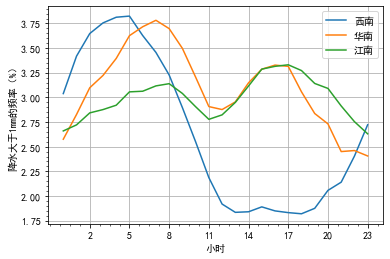

In [23]:
for i in range(len(region_list)):
    plt.plot(x,p[i]*100,label= region_list[i])
plt.xticks(np.arange(2,24,3))
plt.legend()
plt.minorticks_on()
plt.grid()
plt.xlabel("小时")
plt.ylabel("降水大于1mm的频率（%）")